In [16]:
# Vamos a importar las librerias que vamos a utilizar
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
# Iniciamos un dataframe de pandas cargando los datos para comenzar a trabajar
datos = pd.read_csv("../DataSets/ansiedad_depresion_estudiantes.csv")

Antes de comenzar cualquier analisis posterior podriamos revisar si tenemos datos faltantes en nuestro conjunto de datos y actuar en consecuencia.

In [35]:
# Contamos los nulos
datos.isnull().sum()

fecha                 0
genero                0
edad                  0
carrera               0
ansiedad              0
depresion             0
tratamiento           0
hs_estudio_semana     0
ejercicio             0
apoyo_economico       0
nivel_adquisitivo     0
trabajo               0
hijos                 0
consumo_sustancias    0
estado_civil          0
dtype: int64

Vemos que no tenemos datos faltantes, si asi fuera tendriamos que plantear estrategias de imputacion de los datos faltantes o estableces un criterio para trabajar con ellos. En cualquier caso, siempre debemos documentar nuestras deciciones y el por que de ellas.

## Analisis univariado


Realizar un análisis univariado nos permitirá obtener una mejor comprensión de cada variable por separado y su distribucion y podrás identificar patrones, valores atípicos, y otras características importantes en el dataset.

In [9]:
# Vamos a dar un vistazo a nuestros datos.
datos.head()

,fecha,genero,edad,carrera,ansiedad,depresion,tratamiento,hs_estudio_semana,ejercicio,apoyo_economico,nivel_adquisitivo,trabajo,hijos,consumo_sustancias,estado_civil
0,2020-03-05,M,20,ingenieria,si,no,no,26,si,si,bajo,no,no,no,casado
1,2020-12-11,H,19,sistemas,no,no,no,26,si,no,medio,no,no,si,casado
2,2020-11-15,H,25,sistemas,no,no,si,23,si,si,alto,si,no,no,casado
3,2020-03-16,M,24,enfermeria,si,no,si,15,no,no,medio,no,si,no,soltero
4,2020-12-13,H,21,ingenieria,no,no,no,5,no,si,alto,no,no,no,casado


Podemos ver solo las columnas (variables) de nuestro dataframe para comenzar
a realizar mas comodamente el analisis univariado, columna por columna.

In [10]:
datos.columns

Index(['fecha', 'genero', 'edad', 'carrera', 'ansiedad', 'depresion',
       'tratamiento', 'hs_estudio_semana', 'ejercicio', 'apoyo_economico',
       'nivel_adquisitivo', 'trabajo', 'hijos', 'consumo_sustancias',
       'estado_civil'],
      dtype='object')

1. **GENERO**: Vamos a comenzar a analizar la columna genero y dejaremos fecha para mas adelante, ya que la variable fecha es un poco mas compleja de trabajar. Respecto al a la variable genero vamos vizalizar la distribucion de frecuencias de cada categoria (M, F, u otras si las hubiera).


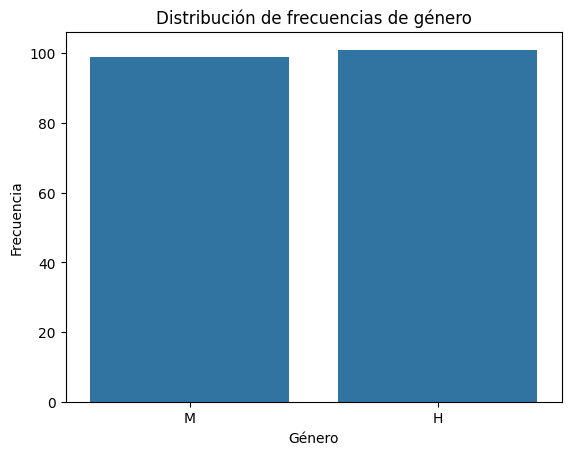

In [29]:
# Crea un gráfico de conteo para visualizar la distribución de frecuencias de cada categoría en la columna "genero"
sns.countplot(x="genero", data=datos)

# Configura el título y los nombres de los ejes
plt.title("Distribución de frecuencias de género")
plt.xlabel("Género")
plt.ylabel("Frecuencia")

# Muestra el gráfico
plt.show()


---


2. **EDAD**: Vamos a calcular las medidas de tendencia central (media, mediana, y moda), dispersión (rango, varianza, y desviación estándar), y  luego vamos a vizulizar la distribucion con un grafico de caja.

In [31]:
# Vamos a calcular algunos estadisticos de la variable edad
datos["edad"].describe()


count    200.000000
mean      21.235000
std        2.391311
min       18.000000
25%       19.000000
50%       21.000000
75%       23.000000
max       25.000000
Name: edad, dtype: float64

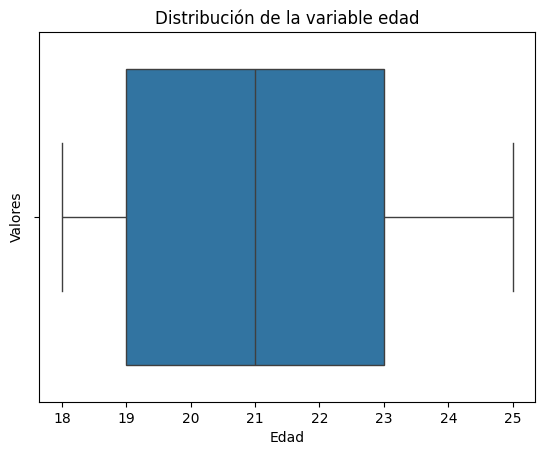

In [34]:
# Visualiza la distribución de la variable "edad" utilizando un boxplot
sns.boxplot(x="edad", data=datos)

# Configura el título y los nombres de los ejes
plt.title("Distribución de la variable edad")
plt.xlabel("Edad")
plt.ylabel("Valores")

# Muestra el gráfico
plt.show()


El boxplot creado con sns.boxplot() debe mostrar los outliers (valores atípicos) por defecto. Los outliers son representados como puntos que se encuentran fuera de los "bigotes" (whiskers) del boxplot. En este caso no encontramos ningun outlier.

---

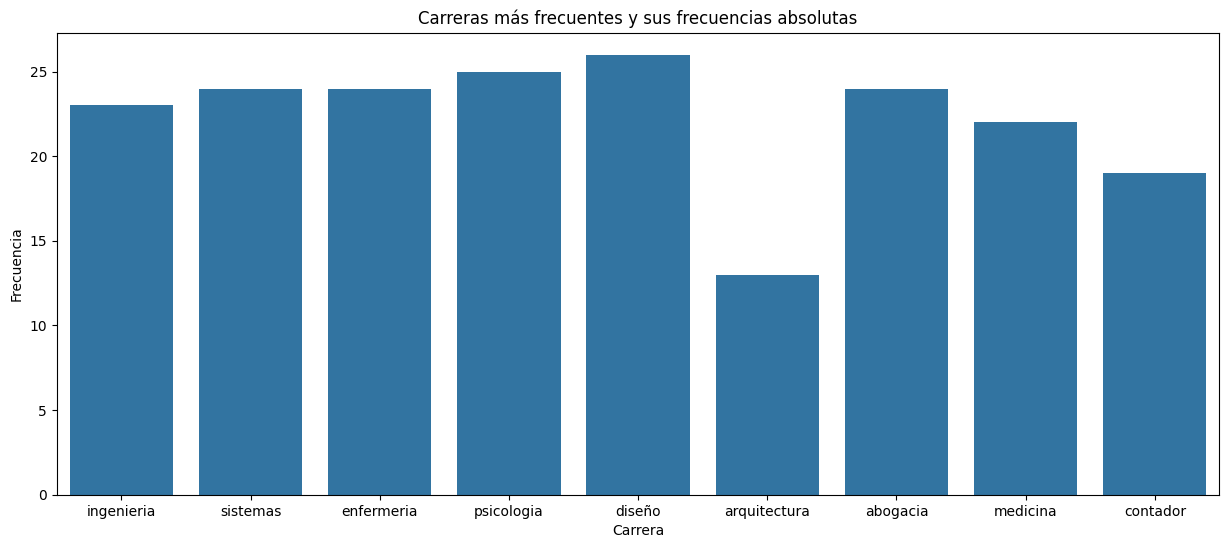

In [39]:
# Ajusta el tamaño de la figura para que entren todos los datos
plt.figure(figsize=(15, 6))

# Crea un gráfico de barras con las carreras más frecuentes y sus frecuencias absolutas
sns.countplot(x="carrera", data=datos)

# Configura el título y los nombres de los ejes
plt.title("Carreras más frecuentes y sus frecuencias absolutas")
plt.xlabel("Carrera")
plt.ylabel("Frecuencia")

# Muestra el gráfico
plt.show()

---

Dada la relacion que existen entre estas tres variables vamos a tratar de vizualizarlas juntas, en tres plots diferentes.

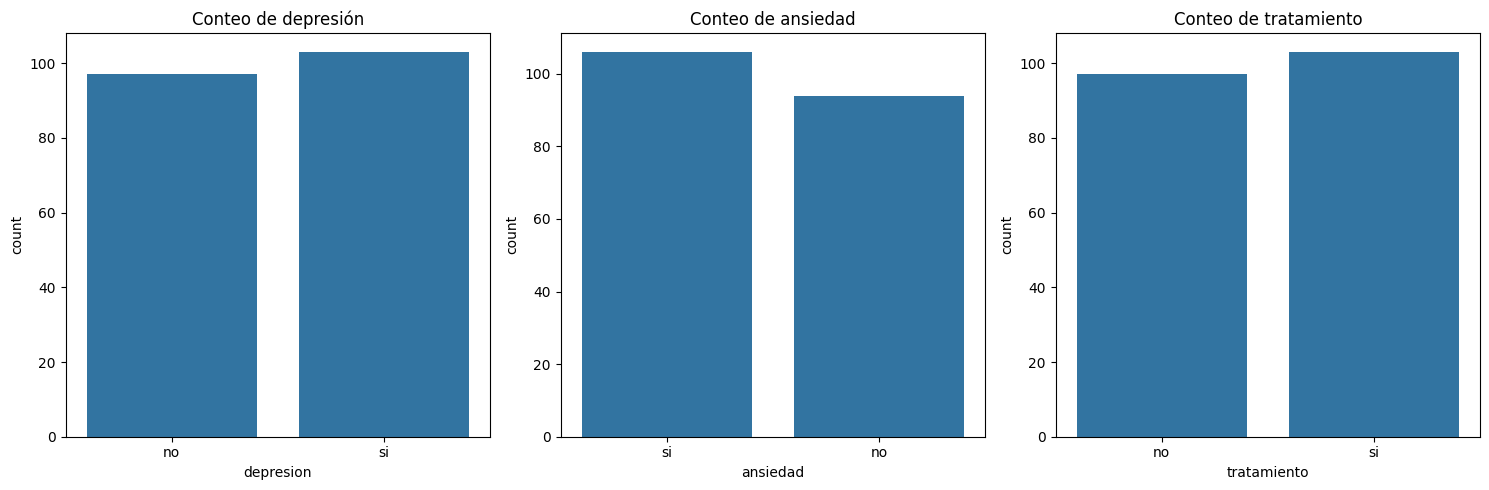

In [40]:
# Crea los subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Crea el gráfico de conteo para la variable "depresion"
sns.countplot(x="depresion", data=datos, ax=axes[0])
axes[0].set_title("Conteo de depresión")

# Crea el gráfico de conteo para la variable "ansiedad"
sns.countplot(x="ansiedad", data=datos, ax=axes[1])
axes[1].set_title("Conteo de ansiedad")

# Crea el gráfico de conteo para la variable "tratamiento"
sns.countplot(x="tratamiento", data=datos, ax=axes[2])
axes[2].set_title("Conteo de tratamiento")

# Muestra los gráficos
plt.tight_layout()
plt.show()


---

9. **ejercicio**: Calcula la frecuencia y el porcentaje de personas que realizan ejercicio y las que no.
12. **trabajo**: Calcula la frecuencia y el porcentaje de personas que trabajan y las que no.


10. **apoyo_economico**: Calcula la frecuencia y el porcentaje de personas que reciben apoyo económico y las que no.
13. **hijos**: Calcula la frecuencia y el porcentaje de personas que tienen hijos y las que no.

14. **consumo_sustancias**: Calcula la frecuencia y el porcentaje de personas que consumen sustancias y las que no.

---

x. **fecha**: Como la variable esta en formato fecha, podemos tratarla como de tipo datatime. Vamos a comenzar a contalivilar la distribucion de los datos para ver el inicio y el fin de recoleccion de los datos en terminos temporales.

In [18]:
# Antes de graficar la variable fecha observemosla con mas detalle
datos["fecha"]

0      2020-03-05
1      2020-12-11
2      2020-11-15
3      2020-03-16
4      2020-12-13
          ...    
195    2019-06-02
196    2019-07-25
197    2019-09-15
198    2019-02-07
199    2019-05-20
Name: fecha, Length: 200, dtype: object

In [23]:
# Vemos que el formato parece ser fecha pero tenemos que asegurarnos que es un dato de tipo datatime
print(datos["fecha"].dtype)

object


Vemos que el formato es "object" y no "datatime" asi que vamos a utilizar la funcion de pandas correspondiente para trasformar los datos.

In [24]:
# Utilizamos la funcion 'pd.to_datetime()'
datos["fecha"] = pd.to_datetime(datos["fecha"])

# Verificamos nuevamente el tipo de dato de la columna "fecha" después de la conversión
print(datos["fecha"].dtype)


datetime64[ns]


In [28]:
# Obtén el mínimo y el máximo de las fechas
fecha_min = datos["fecha"].min()
fecha_max = datos["fecha"].max()

print(f"Fecha mínima: {fecha_min}")
print(f"Fecha máxima: {fecha_max}")


Fecha mínima: 2019-01-03 00:00:00
Fecha máxima: 2020-12-30 00:00:00


# ideas = 

- los datos de 18 a 20 años que no tengan mas de 2 años de estudio
- trabajar con condiciones = 
si hay ansiedad y si hay deprecion y si no hay tratamiento y hay nivel adquisitivo bajo consumo de sustancias y sin apoyo economico bajar 2 puntos 
- si cumplen las condiciones contrarias bajar un punto.

Para realizar un análisis bivariado del dataset proporcionado, puedes explorar las relaciones entre las diferentes variables y obtener ideas de las siguientes maneras:

1. **genero vs. ansiedad/depresion**: Verifica si existe alguna diferencia en la proporción de ansiedad y depresión entre hombres y mujeres. Puedes utilizar gráficos de barras apilados o tablas de contingencia para representar esta relación.

2. **edad vs. ansiedad/depresion/tratamiento**: Analiza si la edad se relaciona con la presencia de ansiedad, depresión, o la búsqueda de tratamiento. Puedes utilizar gráficos de dispersión, diagramas de caja, o realizar correlaciones para explorar estas relaciones.

3. **carrera vs. ansiedad/depresion**: Investiga si ciertas carreras tienen una mayor prevalencia de ansiedad y depresión en comparación con otras. Puedes utilizar gráficos de barras apilados o tablas de contingencia para representar esta información.

4. **hs_estudio_semana vs. ansiedad/depresion**: Verifica si el número de horas de estudio semanal se relaciona con la ansiedad y depresión. Puedes utilizar gráficos de dispersión, diagramas de caja, o realizar correlaciones para explorar estas relaciones.

5. **ejercicio vs. ansiedad/depresion**: Analiza si realizar ejercicio está asociado con menores niveles de ansiedad y depresión. Puedes utilizar gráficos de barras apilados o tablas de contingencia para representar esta información.

6. **apoyo_economico/nivel_adquisitivo vs. ansiedad/depresion**: Investiga si el apoyo económico y el nivel adquisitivo se relacionan con la ansiedad y depresión. Puedes utilizar gráficos de barras apilados o tablas de contingencia para representar esta información.

7. **trabajo vs. ansiedad/depresion**: Verifica si el hecho de trabajar o no se relaciona con la ansiedad y depresión. Puedes utilizar gráficos de barras apilados o tablas de contingencia para representar esta información.

8. **hijos vs. ansiedad/depresion**: Analiza si tener hijos está asociado con mayores niveles de ansiedad y depresión. Puedes utilizar gráficos de barras apilados o tablas de contingencia para representar esta información.

9. **consumo_sustancias vs. ansiedad/depresion**: Investiga si el consumo de sustancias se relaciona con la ansiedad y depresión. Puedes utilizar gráficos de barras apilados o tablas de contingencia para representar esta información.

10. **estado_civil vs. ansiedad/depresion**: Verifica si el estado civil se relaciona con la ansiedad y depresión. Puedes utilizar gráficos de barras apilados o tablas de contingencia para representar esta información.

Realizar un análisis bivariado te permitirá identificar posibles relaciones y asociaciones entre las variables, lo que puede ser útil para generar hipótesis y profundizar en el análisis.